In [24]:
import pandas as pd
import numpy as np
import pathlib 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
import pandas as pd
import argparse
import pysam

warnings.filterwarnings('ignore')

outdir = "/media/hieunguyen/HNSD_mini/outdir"
PROJECT = "TMD450_GW_like_features"

path_to_read_data = "/media/hieunguyen/GSHD_HN01/raw_data/reads_from_450_regions"
metadata = pd.read_excel("metadata_cfDNA_lowpdepth_TMD_bam_cov.xlsx")

path_to_main_output = os.path.join(outdir, PROJECT)
os.system(f"mkdir -p {path_to_main_output}")

all_files = [item for item in pathlib.Path(path_to_read_data).glob("*.csv")]
print(f"Number of samples in this folder: {len(all_files)}")

available_samples = [item.name.split("/")[-1].split(".sorted")[0] for item in all_files]

Number of samples in this folder: 7289


<Axes: xlabel='flen', ylabel='alpha'>

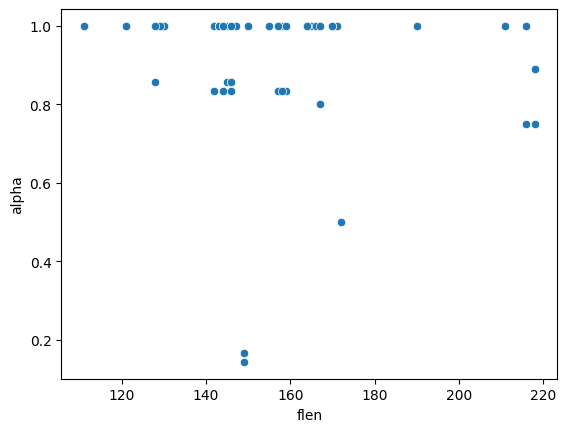

In [21]:
file = all_files[2]
tmpdf = pd.read_csv(file, index_col=0)
tmpdf["flen"] = tmpdf["flen"].apply(lambda x: abs(x))
region = "chr1:1163599-1163832"
flen_methyl = tmpdf[tmpdf["region"] == region][["flen", "alpha"]]
flen_methyl = flen_methyl[(flen_methyl["flen"] <= 250) & (flen_methyl["flen"] >= 50)]
sns.scatterplot(flen_methyl, x = "flen", y = "alpha")

In [28]:
metadata[metadata["SampleID"].isin(available_samples)].groupby("Label")["SampleID"].count()

Label
Breast                   453
CRC                      377
Control                 5827
Gastric                  159
Liver                    136
Lung                     293
Ovarian cancer             1
Pancreatic cancer          5
benign breast              3
benign gastric            10
benign lung                1
multiple benign            8
no lesions                 9
other benign lesions       7
Name: SampleID, dtype: int64